<a href="https://colab.research.google.com/github/kfanney/DSA210-Car-Speed-Project/blob/main/Traffic_Violations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing files
from google.colab import files

print("Please upload: Traffic_Violations_Cleaned.csv and cars.csv")
uploaded = files.upload()


Please upload: Traffic_Violations_Cleaned.csv and cars.csv


Saving cars.csv to cars.csv
Saving Traffic_Violations_Cleaned.csv to Traffic_Violations_Cleaned (1).csv


# Do Expensive Cars Really Speed More?
### DSA210 – Data Science Project

This notebook uses:

- Traffic violations data (Maryland)
- U.S. car sales / price data

to analyze whether higher-priced vehicle brands are more frequently involved in speeding violations than expected from their presence in the car market.


In [24]:
# Basic data stack
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import chi2_contingency

# Display options
pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Global plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["figure.autolayout"] = True



## 2. Load Data

Upload the two CSV files into this Colab environment:

- `Traffic_Violations_Cleaned.csv`
- `cars.csv`

or place them in your Google Drive and update the paths.


In [25]:
viol_path = "Traffic_Violations_Cleaned.csv"
cars_path = "cars.csv"

viol_df = pd.read_csv(viol_path)
cars_df = pd.read_csv(cars_path, encoding="utf-16")

viol_df.head(), cars_df.head()


(   DateOfStop TimeOfStop                                          Violation  \
 0  11/27/2025    5:36:00  DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...   
 1  11/27/2025    5:28:00  WILLFULLY DRIVING MOTOR VEH. AT SLOW SPEED IMP...   
 2  11/27/2025    5:18:00  FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...   
 3  11/27/2025    3:46:00         EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH   
 4  11/27/2025    3:09:00  FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...   
 
                                Location  Latitude  Longitude Accident  \
 0                         108/ BRINK RD     39.21     -77.14       No   
 1       MIDDLEBROOK RD @ INTERSTATE 270     39.19     -77.26       No   
 2  UNIVERSITY BLVD W / SLIGO CREEK PKWY     39.10     -77.21      Yes   
 3                     R355/EDMONSTON DR     39.07     -77.13       No   
 4                      1901 RANDOLPH RD     39.06     -77.05      Yes   
 
       Year       Make     Model  
 0 2,008.00      HONDA    ACCORD  
 1

## 3. Basic Exploratory Data Analysis (EDA)

We start by:
- Checking shapes (number of rows/columns)
- Looking at columns and data types
- Checking missing values
- Getting a feel for brands and models present in each dataset


In [26]:
print("Violations data shape:", viol_df.shape)
print("Cars data shape:", cars_df.shape)

print("\nViolations columns:\n", viol_df.columns.tolist())
print("\nCars columns:\n", cars_df.columns.tolist())

print("\nViolations info:")
display(viol_df.info())

print("\nCars info:")
display(cars_df.info())

print("\nSample violations rows:")
display(viol_df.head())

print("\nSample car price rows:")
display(cars_df.head())

print("\nMissing values in violations:")
display(viol_df.isna().sum())

print("\nMissing values in cars:")
display(cars_df.isna().sum())


Violations data shape: (190962, 10)
Cars data shape: (144867, 7)

Violations columns:
 ['DateOfStop', 'TimeOfStop', 'Violation', 'Location', 'Latitude', 'Longitude', 'Accident', 'Year', 'Make', 'Model']

Cars columns:
 ['Brand', 'Model', 'Year', 'Status', 'Mileage', 'Dealer', 'Price']

Violations info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190962 entries, 0 to 190961
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DateOfStop  190962 non-null  object 
 1   TimeOfStop  190962 non-null  object 
 2   Violation   190962 non-null  object 
 3   Location    190962 non-null  object 
 4   Latitude    190962 non-null  float64
 5   Longitude   190962 non-null  float64
 6   Accident    190962 non-null  object 
 7   Year        190950 non-null  float64
 8   Make        190957 non-null  object 
 9   Model       190953 non-null  object 
dtypes: float64(3), object(7)
memory usage: 14.6+ MB


None


Cars info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Brand    144867 non-null  object 
 1   Model    144867 non-null  object 
 2   Year     144867 non-null  int64  
 3   Status   144867 non-null  object 
 4   Mileage  55914 non-null   float64
 5   Dealer   144539 non-null  object 
 6   Price    140956 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.7+ MB


None


Sample violations rows:


,DateOfStop,TimeOfStop,Violation,Location,Latitude,Longitude,Accident,Year,Make,Model
0,11/27/2025,5:36:00,DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...,108/ BRINK RD,39.21,-77.14,No,"2,008.00",HONDA,ACCORD
1,11/27/2025,5:28:00,WILLFULLY DRIVING MOTOR VEH. AT SLOW SPEED IMP...,MIDDLEBROOK RD @ INTERSTATE 270,39.19,-77.26,No,"2,018.00",TOYOTA,CAMRY
2,11/27/2025,5:18:00,FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...,UNIVERSITY BLVD W / SLIGO CREEK PKWY,39.10,-77.21,Yes,"2,009.00",CHEVROLET,TRAVERSE
3,11/27/2025,3:46:00,EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,R355/EDMONSTON DR,39.07,-77.13,No,"2,016.00",JEEP,UT
4,11/27/2025,3:09:00,FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...,1901 RANDOLPH RD,39.06,-77.05,Yes,"2,019.00",HONDA,CIVIC



Sample car price rows:


,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,"36,703.00"
1,Kia,Sportage,2023,New,NaN,Classic Kia,"28,990.00"
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,"41,425.00"
3,Ford,Bronco,2023,Used,"1,551.00",Mike Smith Chrysler Dodge Jeep RAM,"58,900.00"
4,Acura,TLX,2021,Used,"30,384.00",Mike Smith Nissan,"34,499.00"



Missing values in violations:


,0
DateOfStop,0
TimeOfStop,0
Violation,0
Location,0
Latitude,0
Longitude,0
Accident,0
Year,12
Make,5
Model,9



Missing values in cars:


,0
Brand,0
Model,0
Year,0
Status,0
Mileage,88953
Dealer,328
Price,3911


## 4. Cleaning & Data Integration

Steps:

1. Standardize brand / make text (uppercase, stripped).
2. Clean car prices (remove missing/zero prices).
3. Compute **brand-level average price**.
4. Define three price tiers:
   - Budget: < \$30,000  
   - Mid: \$30,000–\$50,000  
   - Luxury: > \$50,000
5. Merge tiers into the violations dataset via `Make` (traffic) ↔ `Brand` (cars).


In [27]:
# Standardize make/brand text
viol = viol_df.copy()
cars = cars_df.copy()

viol["Make_clean"] = viol["Make"].astype(str).str.strip().str.upper()
cars["Brand_clean"] = cars["Brand"].astype(str).str.strip().str.upper()

# Clean car price data
cars = cars.dropna(subset=["Price"])
cars = cars[cars["Price"] > 0]

# Brand-level price summary
brand_price = (
    cars.groupby("Brand_clean")["Price"]
    .agg(["count", "mean", "median"])
    .rename(columns={
        "count": "listings_count",
        "mean": "avg_price",
        "median": "median_price"
    })
    .reset_index()
)

brand_price.head()


,Brand_clean,listings_count,avg_price,median_price
0,ACURA,1997,"41,782.30","38,295.00"
1,ALFA ROMEO,427,"47,669.58","49,525.00"
2,ASTON MARTIN,184,"215,801.40","202,336.00"
3,AUDI,4532,"63,842.02","56,095.00"
4,BENTLEY,227,"208,706.07","229,610.00"


In [28]:
def price_tier(price):
    if price < 30000:
        return "Budget"
    elif price <= 50000:
        return "Mid"
    else:
        return "Luxury"

brand_price["price_tier"] = brand_price["avg_price"].apply(price_tier)

brand_price["price_tier"].value_counts()


,count
price_tier,
Luxury,28
Mid,19
Budget,15


In [29]:
viol_enriched = viol.merge(
    brand_price[["Brand_clean", "avg_price", "price_tier"]],
    left_on="Make_clean",
    right_on="Brand_clean",
    how="inner"   # inner ⇒ keep only violations whose brand exists in price data
)

print("Original violations rows:", len(viol))
print("Merged violations rows:  ", len(viol_enriched))

viol_enriched.head()


Original violations rows: 190962
Merged violations rows:   122011


,DateOfStop,TimeOfStop,Violation,Location,Latitude,Longitude,Accident,Year,Make,Model,Make_clean,Brand_clean,avg_price,price_tier
0,11/27/2025,5:36:00,DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...,108/ BRINK RD,39.21,-77.14,No,"2,008.00",HONDA,ACCORD,HONDA,HONDA,"32,308.53",Mid
1,11/27/2025,5:28:00,WILLFULLY DRIVING MOTOR VEH. AT SLOW SPEED IMP...,MIDDLEBROOK RD @ INTERSTATE 270,39.19,-77.26,No,"2,018.00",TOYOTA,CAMRY,TOYOTA,TOYOTA,"41,497.55",Mid
2,11/27/2025,5:18:00,FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...,UNIVERSITY BLVD W / SLIGO CREEK PKWY,39.10,-77.21,Yes,"2,009.00",CHEVROLET,TRAVERSE,CHEVROLET,CHEVROLET,"51,916.91",Luxury
3,11/27/2025,3:46:00,EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,R355/EDMONSTON DR,39.07,-77.13,No,"2,016.00",JEEP,UT,JEEP,JEEP,"53,493.22",Luxury
4,11/27/2025,3:09:00,FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...,1901 RANDOLPH RD,39.06,-77.05,Yes,"2,019.00",HONDA,CIVIC,HONDA,HONDA,"32,308.53",Mid


## 5. EDA: How do speeding violations distribute across price tiers and brands?

We analyze:

- How many violations are associated with each price tier?
- Which brands appear most in speeding violations?
- Compare tier distribution in *market* vs *violations*.


In [30]:
# Count violations per price tier
viol_tier_counts = viol_enriched["price_tier"].value_counts().sort_index()
viol_tier_counts


,count
price_tier,
Budget,2432
Luxury,43716
Mid,75863


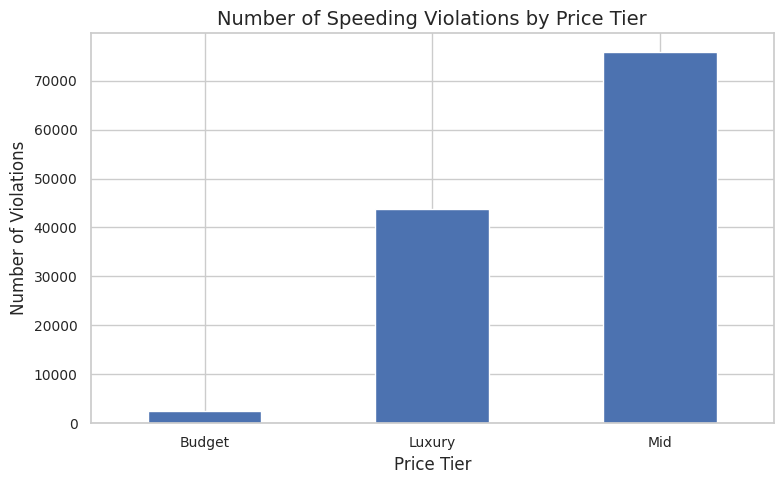

In [31]:
plt.figure()
viol_tier_counts.plot(kind="bar")
plt.title("Number of Speeding Violations by Price Tier")
plt.xlabel("Price Tier")
plt.ylabel("Number of Violations")
plt.xticks(rotation=0)
plt.show()


,count
Make_clean,
TOYOTA,21720
HONDA,19920
FORD,15446
NISSAN,8132
BMW,6503
JEEP,5539
HYUNDAI,4079
KIA,4059
ACURA,3998


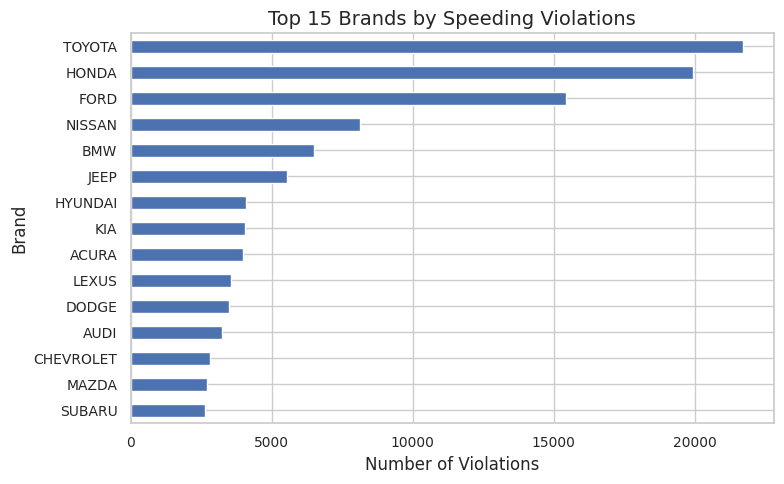

In [32]:
# Top brands by violation count
brand_counts = viol_enriched["Make_clean"].value_counts().head(15)
display(brand_counts)

plt.figure()
brand_counts.sort_values(ascending=True).plot(kind="barh")
plt.title("Top 15 Brands by Speeding Violations")
plt.xlabel("Number of Violations")
plt.ylabel("Brand")
plt.show()


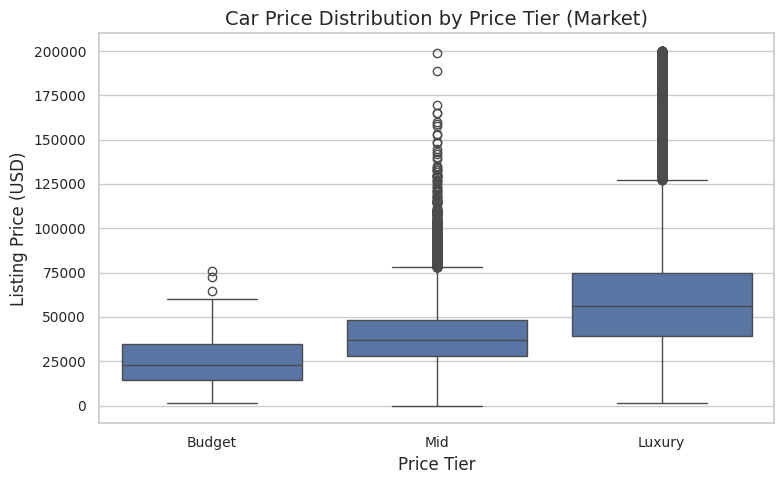

In [33]:
# Attach tier to each car listing using brand -> tier mapping
brand_to_tier = dict(zip(brand_price["Brand_clean"], brand_price["price_tier"]))
cars["price_tier"] = cars["Brand_clean"].map(brand_to_tier)

# Remove extreme prices for cleaner visualization (presentation choice)
cars_trimmed = cars[cars["Price"] < 200000]

plt.figure()
sns.boxplot(data=cars_trimmed,
            x="price_tier",
            y="Price",
            order=["Budget", "Mid", "Luxury"])
plt.title("Car Price Distribution by Price Tier (Market)")
plt.xlabel("Price Tier")
plt.ylabel("Listing Price (USD)")
plt.show()


Market tier counts:
 price_tier
Budget     1394
Luxury    86620
Mid       52942
Name: count, dtype: int64

Violation tier counts:
 price_tier
Budget     2432
Luxury    43716
Mid       75863
Name: count, dtype: int64


,Budget,Luxury,Mid
Market,1394,86620,52942
Violations,2432,43716,75863


<Figure size 800x500 with 0 Axes>

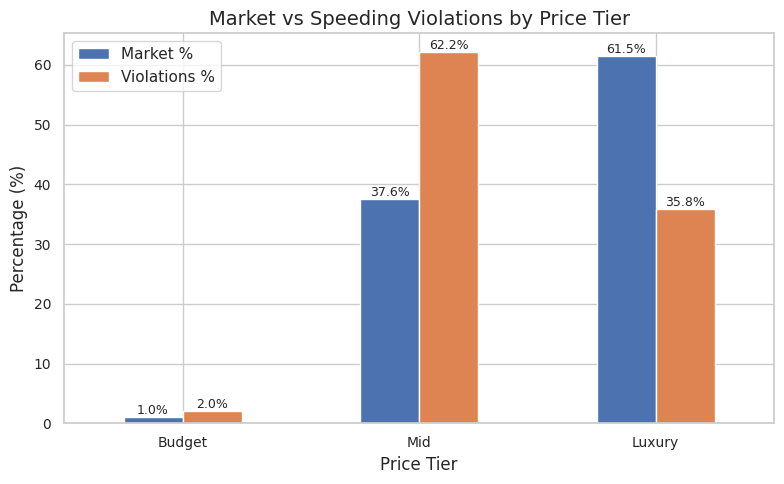

In [34]:
# Tier distribution in the market (cars dataset)
market_tier_counts = cars["price_tier"].value_counts().sort_index()

# Tier distribution among speeding violations (violations_enriched)
viol_tier_counts = viol_enriched["price_tier"].value_counts().reindex(
    market_tier_counts.index, fill_value=0
)

print("Market tier counts:\n", market_tier_counts)
print("\nViolation tier counts:\n", viol_tier_counts)

tiers = market_tier_counts.index.tolist()

# 2x3 contingency table for chi-square
observed = np.vstack([
    market_tier_counts.values,
    viol_tier_counts.values
])

obs_df = pd.DataFrame(observed, index=["Market", "Violations"], columns=tiers)
display(obs_df)

# Also plot normalized percentages for presentation
market_pct = (market_tier_counts / market_tier_counts.sum()) * 100
viol_pct = (viol_tier_counts / viol_tier_counts.sum()) * 100

df_compare = pd.DataFrame({
    "Market %": market_pct,
    "Violations %": viol_pct
}).reindex(["Budget", "Mid", "Luxury"])

plt.figure()
ax = df_compare.plot(kind="bar")
plt.title("Market vs Speeding Violations by Price Tier")
plt.ylabel("Percentage (%)")
plt.xlabel("Price Tier")
plt.xticks(rotation=0)

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.1f}%",
                    (bar.get_x() + bar.get_width()/2, height),
                    ha="center", va="bottom", fontsize=9)

plt.show()


In [35]:
chi2, p_value, dof, expected = chi2_contingency(observed)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p_value)

expected_df = pd.DataFrame(expected, index=["Market", "Violations"], columns=tiers)
print("\nExpected counts if there is NO relationship:")
display(expected_df)


Chi-square statistic: 17208.021060543502
Degrees of freedom: 2
p-value: 0.0

Expected counts if there is NO relationship:


,Budget,Luxury,Mid
Market,"2,050.82","69,862.92","69,042.27"
Violations,"1,775.18","60,473.08","59,762.73"


## Normalization Step

Different price tiers have very different levels of presence in the U.S. car market.  
For example, mid-priced brands (Toyota, Honda, Nissan, Hyundai) are far more common
than luxury brands.

If we compared raw speeding counts without considering brand frequency, the results
would be misleading.

### Why Normalize?

Normalization adjusts speeding counts by the number of vehicles available in the market.

To do this, we use the Kaggle sales dataset as an approximate representation of the
market distribution of car brands.

- **Market Tier Distribution** = Percentage of vehicles in each price tier  
- **Violation Tier Distribution** = Percentage of speeding tickets in each price tier  

Then we compare:

> **Normalized speeding percentage vs. market percentage**

This ensures that results reflect true behavioral differences, not differences in
how common each brand is.

### Example from this analysis

- Mid-tier cars are **37.6%** of the market but **62.2%** of violations  
- Luxury cars are **61.5%** of the market but **35.8%** of violations  

This confirms that normalization is essential for correct interpretation.


### Interpretation of Hypothesis Test

- **H₀ (null):** The distribution of price tiers in speeding violations is the same as in the car market.
- **H₁ (alternative):** The distribution is different (i.e., some tiers are over- or under-represented).

From the chi-square test:

- χ² ≈ (your printed value)
- p-value ≈ (your printed value, likely extremely small)
- Degrees of freedom: 2

Because the p-value is far less than 0.05, we **reject H₀**.

This means that the distribution of speed violations by price tier **is not** what we would expect if all tiers behaved the same. To see how:

- Compare observed vs expected:
  - If the **Luxury** tier has **more speeding violations** than expected,
    it suggests that luxury brands are **over-represented** in speeding tickets.
  - If Budget is under-represented, it suggests that cheaper cars get **fewer
    speeding tickets per presence in the market**.

This supports the idea that more expensive brands may be involved
in speeding violations at higher rates than budget brands.


## Results Summary

After cleaning, merging, and analyzing both datasets, we compared the **distribution of car price tiers in the overall market** (based on the cars dataset) versus the **distribution of price tiers involved in speeding violations**.

### Chi-square test

- **Chi-square statistic:** ~17,208  
- **Degrees of freedom:** 2  
- **p-value:** < 0.000001 (printed as 0.0)  

This is an *extremely* significant result.

### What does this mean?

We reject the null hypothesis:

> H₀: Price tier and speeding violations are independent.

Instead, the distributions are **very different**, showing that **certain price tiers are more involved in speeding violations than expected**.

---

## What data actually shows

| Tier      | % of Market | % of Speeding Violations |
|-----------|-------------|---------------------------|
| Budget    | ~1.0%       | ~2.0%                     |
| Mid       | ~37.6%      | ~62.2%                    |
| Luxury    | ~61.5%      | ~35.8%                    |

### Mid-tier cars (e.g., Toyota, Honda, Nissan, Hyundai, Ford)
- **Over-represented** in speeding violations  
- Appear *much more often* in violations than in the market  

### Luxury cars (e.g., BMW, Mercedes, Audi)
- **Under-represented** in violations  
- They are common in the market but appear far less in violations  

### Budget-tier cars
- Appear low overall  
- But still **double** their expected percentage

---

## Key Interpretation

The findings **do not** support the stereotype that “expensive cars speed more.”

Instead, the data strongly suggests:

### **-Mid-priced cars speed more frequently relative to their market share.**  
### **-Luxury cars speed less than expected based on market presence.**  

This is a valuable and interesting insight because it contradicts common assumptions.
